In [1]:
import numpy as np                   
import matplotlib.pyplot as plt     
import random                       

import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

Charger les datasets d'entrainement et de test

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", Y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Afficher quelques images d'exemple en utilisant matplotlib

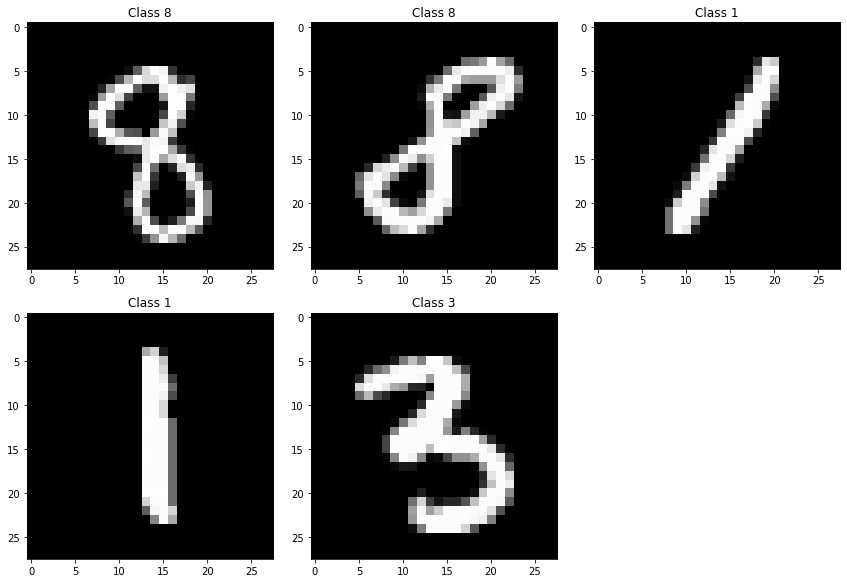

In [9]:
plt.rcParams['figure.figsize'] = (12,12) #on aggrandit les images encore plus
random.seed(3)
nums = [random.randint(3, len(X_train)) for x in range(5)] #on choisit d'afficher 5 chiffres entre 3 et X_train 

for i, num in enumerate(nums):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[num]))
    
plt.tight_layout()

Afficher la matrice correspondant à un seul chiffre

In [10]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[nums[2]])

0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0   45  229  203  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0  169  252  252  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0   23  234  252  214  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0   79  252  252  139  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0   63  255  253  253   78  0  0  0  0  0  0  0  
0

Reformater l'input

In [11]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train, X_test = X_train / 255.0, X_test / 255.0

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Construisons un premier réseau

In [ ]:
Initialiser le modèle avec Sequential()

In [13]:
params = {'dense_size': 68, 
          'dense_layers':4}

In [14]:
params['dense_size']

68

In [15]:
model = tf.keras.models.Sequential()

Ajouter des couches au modèle

In [16]:
model.add(
    tf.keras.layers.Dense(params['dense_size'], input_shape=(784,))
    ) # une couche dense (fully connected) de taille 68

Ajouter une activation (Relu)

In [18]:
model.add(
    tf.keras.layers.Activation('relu')
    )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                53380     
                                                                 
 activation (Activation)     (None, 68)                0         
                                                                 
Total params: 53,380
Trainable params: 53,380
Non-trainable params: 0
_________________________________________________________________


In [19]:
for l in range(params['dense_layers']): 
  model.add(
    tf.keras.layers.Dense(params['dense_size'])
    )
  model.add(
      tf.keras.layers.Activation('relu')
      )


Ajouter une couche de Dropout

In [20]:
model.add(
    tf.keras.layers.Dropout(0.4)
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                53380     
                                                                 
 activation (Activation)     (None, 68)                0         
                                                                 
 dense_1 (Dense)             (None, 68)                4692      
                                                                 
 activation_1 (Activation)   (None, 68)                0         
                                                                 
 dense_2 (Dense)             (None, 68)                4692      
                                                                 
 activation_2 (Activation)   (None, 68)                0         
                                                                 
 dense_3 (Dense)             (None, 68)                4

Ajouter le classifieur 

In [22]:
model.add(
    tf.keras.layers.Dense(10))
model.add(
    tf.keras.layers.Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                53380     
                                                                 
 activation (Activation)     (None, 68)                0         
                                                                 
 dense_1 (Dense)             (None, 68)                4692      
                                                                 
 activation_1 (Activation)   (None, 68)                0         
                                                                 
 dense_2 (Dense)             (None, 68)                4692      
                                                                 
 activation_2 (Activation)   (None, 68)                0         
                                                                 
 dense_3 (Dense)             (None, 68)                4

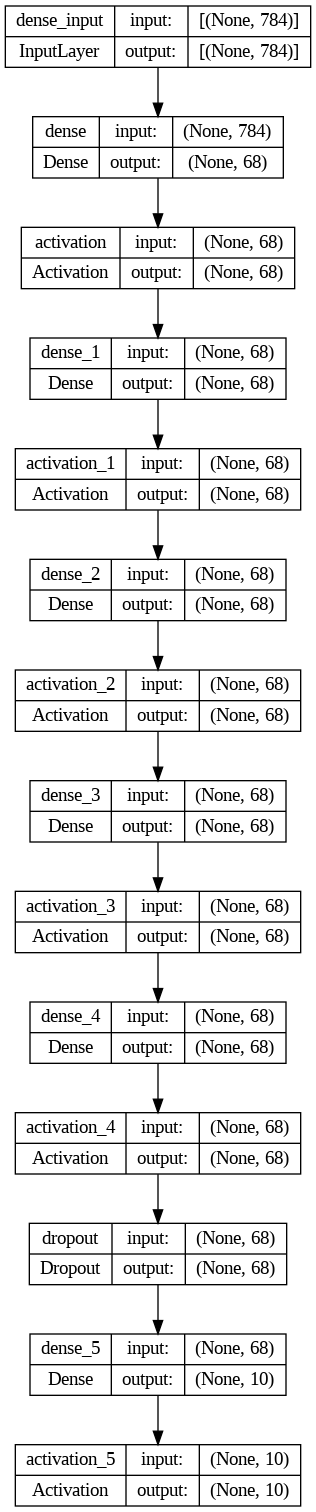

In [23]:
tf.keras.utils.plot_model(model, 'model1.png', show_shapes=True)

Compiler le modèle pour obtenir un modèle executable

In [28]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adamax', 
              metrics=['accuracy'])

Entrainer le modèle

In [36]:
model.fit(X_train,        # input
          Y_train,        # output
          batch_size=64, # diminuer la convergence, plus temps mais plus de performance
          epochs=5,       # nombre d'epochs (passages sur les données )
          verbose=1)  

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0728 - accuracy: 0.9793
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0687 - accuracy: 0.9809
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0631 - accuracy: 0.9823
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0601 - accuracy: 0.9830
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0528 - accuracy: 0.9845


Evaluer le modèle sur les données test

In [37]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0926 - accuracy: 0.9731
Test score: 0.09260712563991547
Test accuracy: 0.9731000065803528


Inspecter les résultats plus précisément avec classification_report et confusion_matrix

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

predicted_classes = model.predict(X_test)
predicted_classes

313/313 [==============================] - 0s 1ms/step


array([[5.46070623e-07, 3.18852517e-06, 1.00960324e-05, ...,
        9.99940217e-01, 2.00963359e-06, 2.08207257e-05],
       [3.40583242e-08, 2.14783395e-05, 9.99934137e-01, ...,
        1.34319146e-06, 1.55474811e-06, 1.57773243e-08],
       [6.06253934e-07, 9.99550581e-01, 1.15108405e-05, ...,
        9.76962256e-05, 1.18425138e-04, 3.61022321e-05],
       ...,
       [3.16228272e-12, 1.30927691e-09, 2.12742512e-09, ...,
        1.62757877e-10, 1.44320958e-10, 1.28208356e-07],
       [1.13114504e-10, 4.46346338e-09, 2.81284218e-10, ...,
        2.71757417e-09, 9.10133213e-09, 4.22427826e-09],
       [9.64979659e-12, 5.66554824e-11, 8.63726018e-12, ...,
        4.94193488e-12, 1.80800278e-10, 1.81629017e-11]], dtype=float32)

In [39]:
predicted_classes = model.predict(X_test).argmax(axis=1)

print(confusion_matrix(Y_test, predicted_classes))
print(classification_report(Y_test, predicted_classes))

313/313 [==============================] - 0s 1ms/step
[[ 967    0    1    2    0    3    2    2    1    2]
 [   0 1126    3    0    0    1    2    0    3    0]
 [   8    3  999    3    2    0    2    9    6    0]
 [   0    1    3  979    0    6    0    7    9    5]
 [   1    0    2    0  961    0    9    1    1    7]
 [   3    0    0   10    1  864    6    1    5    2]
 [   2    2    1    0    8    5  937    1    2    0]
 [   2    7    9    4    3    0    0  992    2    9]
 [   3    0    2    9    6    5    3    4  939    3]
 [   4    3    0    6   17    0    0    4    8  967]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98  

In [40]:
np.nonzero(predicted_classes != Y_test)[0]

array([  18,   92,  115,  151,  247,  259,  321,  340,  381,  445,  448,
        478,  495,  551,  582,  583,  610,  619,  659,  684,  691,  720,
        844,  924,  939,  947,  951, 1014, 1039, 1044, 1112, 1156, 1166,
       1182, 1194, 1226, 1232, 1242, 1247, 1260, 1283, 1299, 1319, 1326,
       1328, 1364, 1393, 1395, 1414, 1444, 1464, 1494, 1500, 1522, 1530,
       1549, 1553, 1581, 1609, 1678, 1681, 1709, 1717, 1721, 1751, 1782,
       1790, 1800, 1850, 1878, 1901, 1941, 1952, 1987, 2004, 2044, 2053,
       2073, 2098, 2109, 2118, 2129, 2130, 2135, 2182, 2185, 2224, 2272,
       2293, 2369, 2387, 2406, 2408, 2414, 2422, 2426, 2433, 2488, 2514,
       2526, 2597, 2648, 2654, 2720, 2810, 2863, 2915, 2921, 2939, 2945,
       2953, 3073, 3117, 3225, 3251, 3289, 3503, 3520, 3549, 3558, 3559,
       3567, 3597, 3674, 3749, 3751, 3767, 3780, 3796, 3811, 3838, 3853,
       3869, 3876, 3893, 3906, 3941, 3943, 3985, 3995, 4000, 4027, 4065,
       4163, 4176, 4199, 4224, 4248, 4255, 4256, 42

In [41]:
correct_indices = np.nonzero(predicted_classes == Y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]


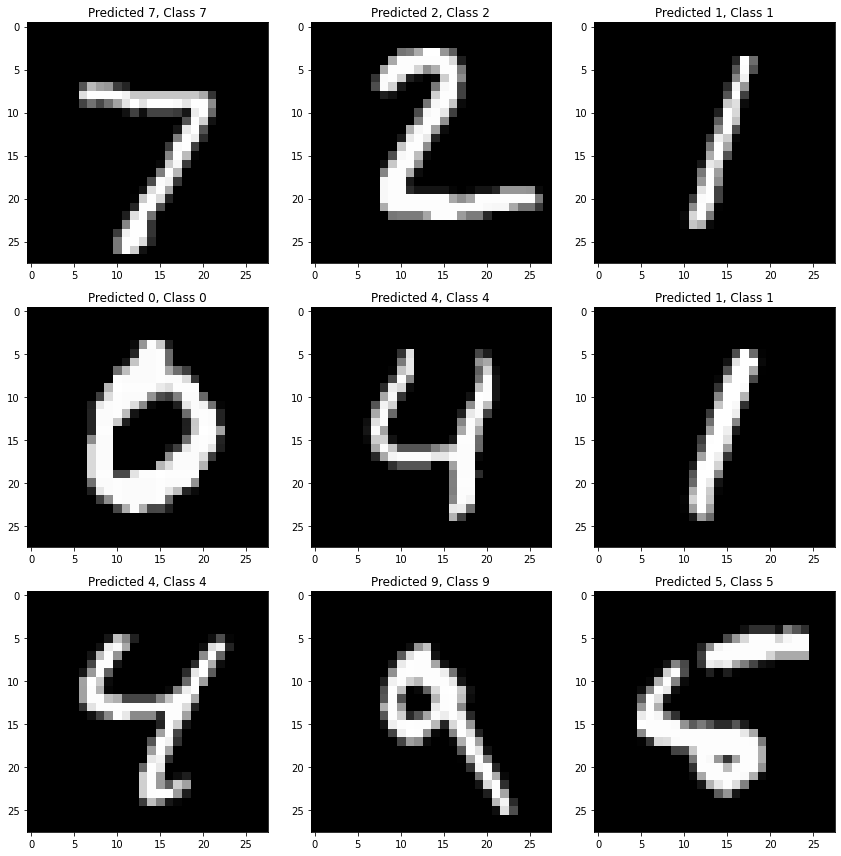

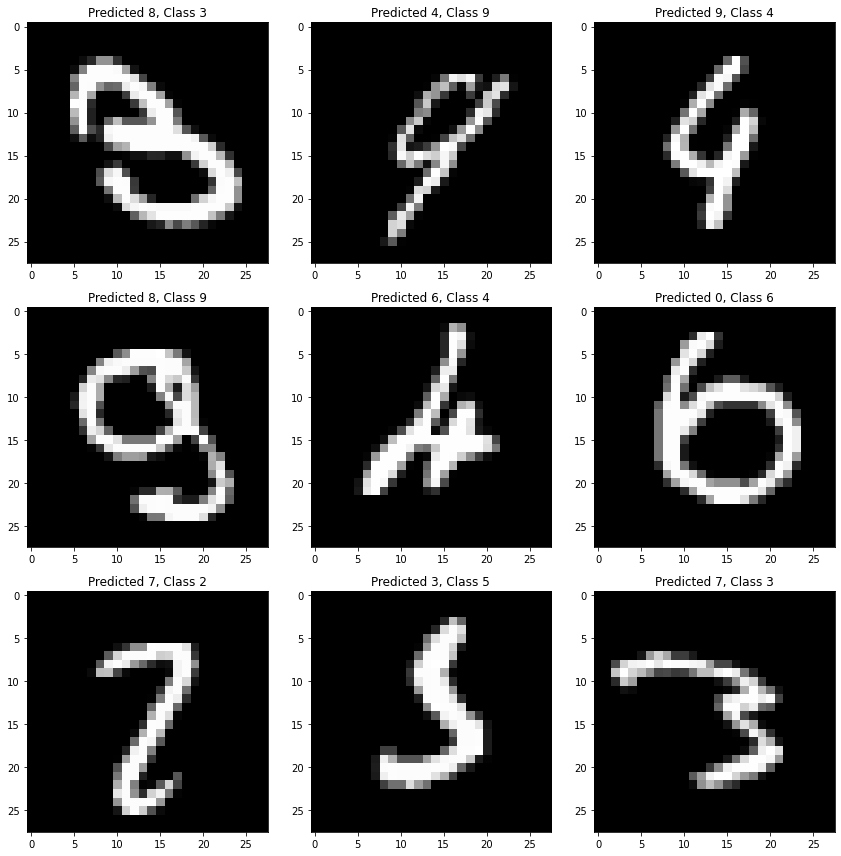

In [42]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
    
plt.tight_layout()


plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))
    
plt.tight_layout()

La convolution

In [44]:
tf.keras.layers.Conv2D(16,                      # on crée 16 filtres vu que cest une tâche de reconnaissance d'image simples
                       (5, 5),                  # kernel de taille (5,5)
                       input_shape=(28,28,1))

In [45]:
tf.keras.layers.MaxPooling2D(pool_size=(3,3))

Preprocessing pour le réseau de convolution

Recharger le dataset

In [46]:
# Recharger le dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Reformater les inputs vers (n_sample,28,28,1) et normaliser

In [47]:
X_train = X_train.reshape(60000, 28, 28, 1) # Ajouter une dimension supplémentaire pour représenter la couche unique
X_test = X_test.reshape(10000, 28, 28, 1)

X_train, X_test = X_train / 255.0, X_test / 255.0

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [48]:
model = tf.keras.models.Sequential()                                 

# Convolution Layer 1
model.add(
    tf.keras.layers.Conv2D(32, (2,2), input_shape=(28,28,1)))            
model.add(
    tf.keras.layers.Activation('relu') )                   

# Convolution Layer 2
model.add(
    tf.keras.layers.Conv2D(16, (3, 3)))                                    
model.add(
    tf.keras.layers.Activation('relu'))                         
model.add(
    tf.keras.layers.MaxPooling2D(pool_size=(1,1)))         

model.add(
    tf.keras.layers.Flatten())                                

# Fully Connected Layer 5
model.add(
    tf.keras.layers.Dense(32))                                               
model.add(
    tf.keras.layers.Activation('relu'))                      

# Fully Connected Layer 6                       
model.add(
    tf.keras.layers.Dropout(0.3))                            
model.add(
    tf.keras.layers.Dense(20))                                
model.add(
    tf.keras.layers.Activation('softmax'))    

In [50]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.fit(X_train, Y_train,  epochs=5, verbose=1)
predicted_classes = model.predict(X_test).argmax(axis=1)

print(confusion_matrix(Y_test, predicted_classes))
print(classification_report(Y_test, predicted_classes))

Epoch 1/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0444 - accuracy: 0.9863
Epoch 2/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0302 - accuracy: 0.9903
Epoch 3/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0247 - accuracy: 0.9916
Epoch 4/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0208 - accuracy: 0.9932
Epoch 5/5
313/313 [==============================] - 3s 10ms/step
[[ 975    0    0    1    0    1    3    0    0    0]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   1    3 1018    1    2    0    0    6    1    0]
 [   0    0    1 1005    0    3    0    0    1    0]
 [   0    1    0    0  971    0    3    1    1    5]
 [   1    0    0    9    0  881    1    0    0    0]
 [   4    4    0    1    1    5  941    0    2    0]
 [   0    3    4    1    0    0    0 1018    1    1]
 [   1    0    4    3    1    3    1    4  956    1]
 [   2    3    0    5    5    2    0    8    

Epoch 1/5
4020/4020 [==============================] - 72s 18ms/step - loss: 0.0251 - accuracy: 0.9914 - val_loss: 0.0206 - val_accuracy: 0.9931
Epoch 2/5
4020/4020 [==============================] - 71s 18ms/step - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.0182 - val_accuracy: 0.9941
Epoch 3/5
4020/4020 [==============================] - 74s 18ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.0214 - val_accuracy: 0.9936
Epoch 4/5
4020/4020 [==============================] - 72s 18ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.0296 - val_accuracy: 0.9925
Epoch 5/5
4020/4020 [==============================] - 71s 18ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0260 - val_accuracy: 0.9932
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


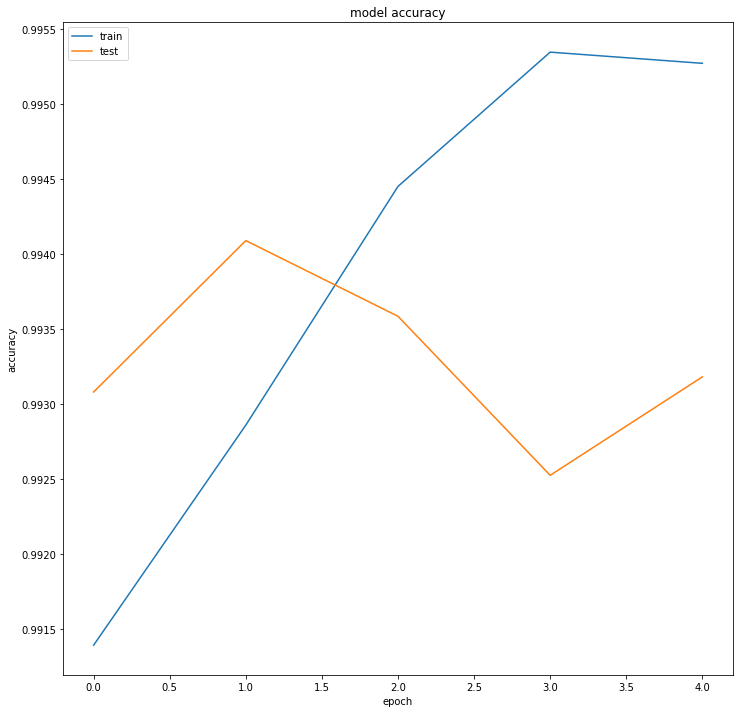

In [52]:
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=5, batch_size=10, verbose=1)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()